In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171056 entries, 0 to 171055
Columns: 135 entries, eventid to related
dtypes: float64(60), int64(17), object(58)
memory usage: 176.2+ MB


**Data Cleaning**

In [13]:
data = data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
         'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
         'weaptype1_txt', 'nkill', 'nwound', 'summary', 'gname']]

Rename columns


In [15]:
data.columns = ['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
              'Latitude', 'Longitude', 'AttackType', 'TargetType',
              'WeaponType', 'Killed', 'Wounded', 'Summary', 'Group']

Filling NaNs in casualties with 0

In [16]:
data['Killed'].fillna(0,inplace=True)
data['Wounded'].fillna(0,inplace=True)

<ipython-input-16-409f91b0ed41>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Killed'].fillna(0,inplace=True)
<ipython-input-16-409f91b0ed41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

New feature: Total Casualties

In [17]:
data['Casualties'] = data['Killed'] + data['Wounded']

**EDA**

In [23]:
print(" Total Attacks:",data.Casualties.shape[0])
print(" Total People Killed:", int(data['Killed'].sum()))
print(" Total People Wounded:", int(data['Wounded'].sum()))
print(" Countries Affected:", data['Country'].nunique())

 Total Attacks: 171056
 Total People Killed: 386308
 Total People Wounded: 499835
 Countries Affected: 205


**Visualizations**

Number of Attacks Per Year

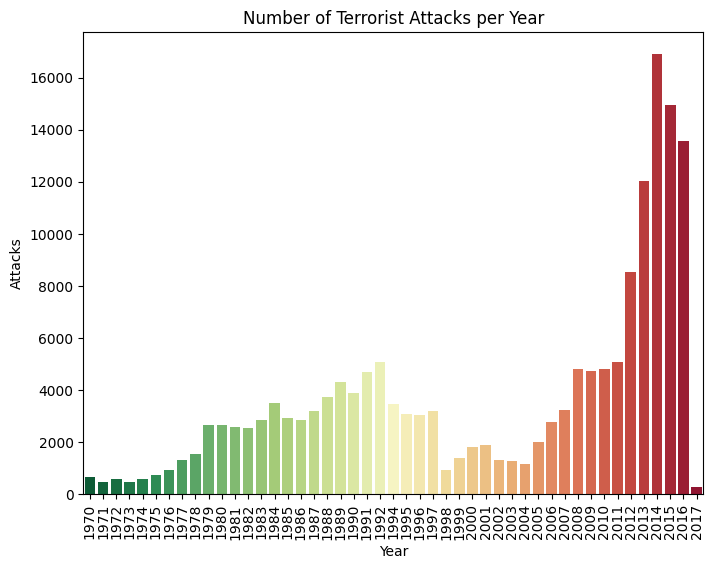

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Year',hue='Year', palette='RdYlGn_r', legend=False)
plt.xticks(rotation=90)
plt.title("Number of Terrorist Attacks per Year")
plt.ylabel("Attacks")
plt.show()

Attacks by Region

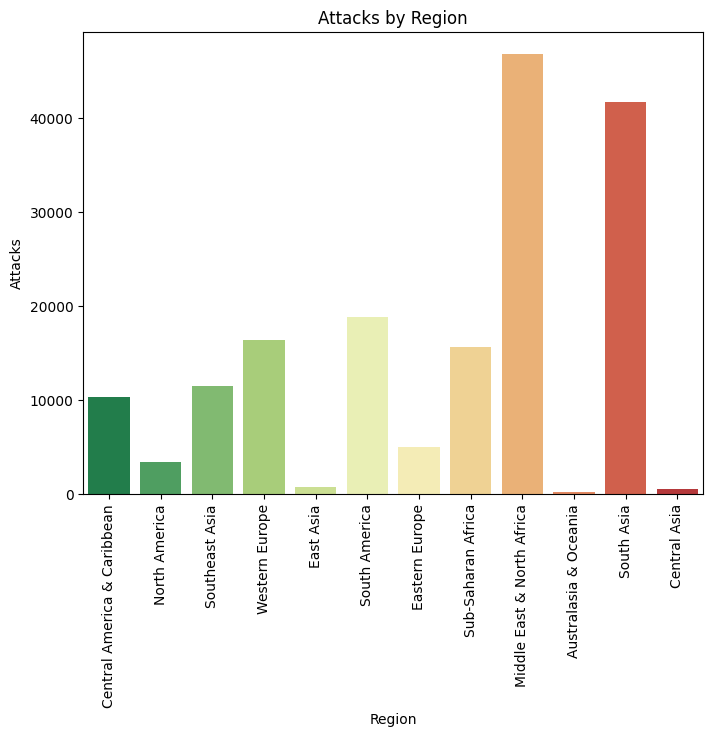

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Region',hue='Region', palette='RdYlGn_r', legend=False)
plt.xticks(rotation=90)
plt.title("Attacks by Region")
plt.xlabel("Region")
plt.ylabel("Attacks")
plt.show()

Top 10 Countries by Attacks

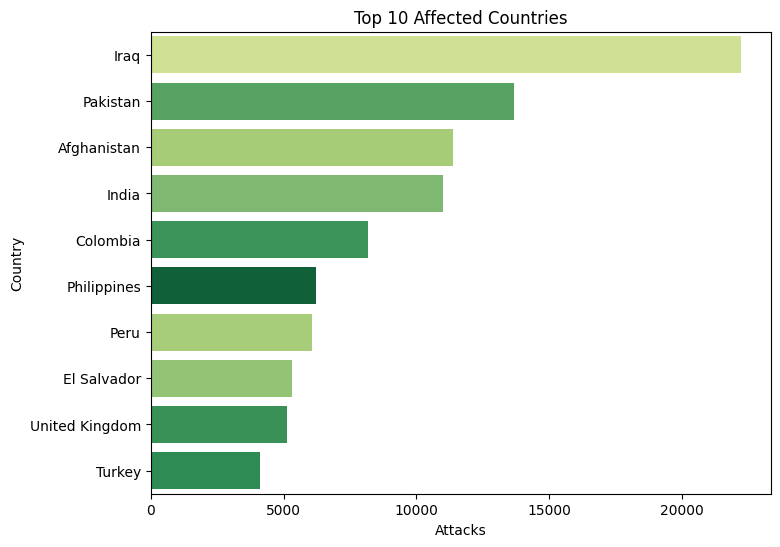

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, y='Country',hue='Country',legend=False, palette='RdYlGn_r', order=data['Country'].value_counts().index[:10])

plt.title("Top 10 Affected Countries")
plt.ylabel("Country")
plt.xlabel("Attacks")
plt.show()

Most Common Attack Types

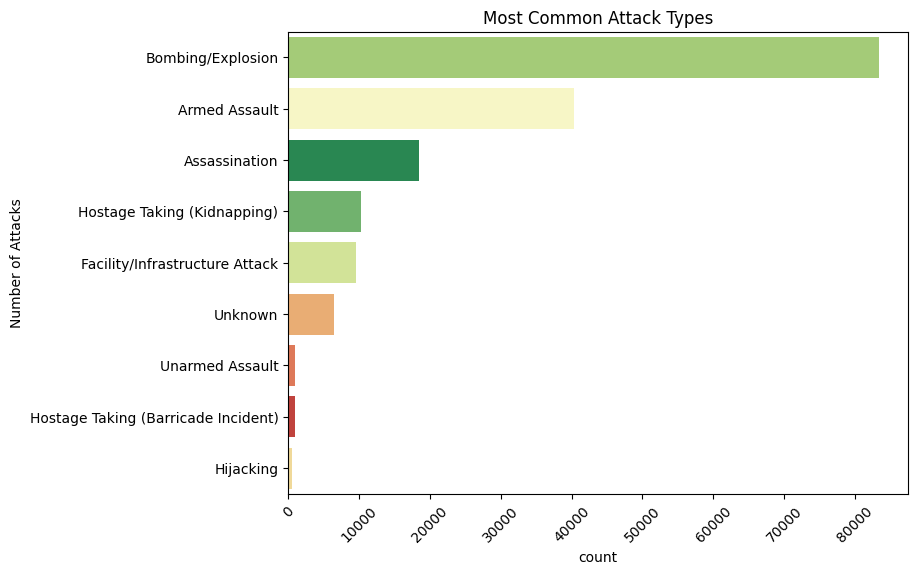

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, y='AttackType',hue='AttackType',legend=False, palette='RdYlGn_r', order=data['AttackType'].value_counts().index[:10])
plt.title("Most Common Attack Types")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.show()

Top Terrorist Groups (excluding 'Unknown')

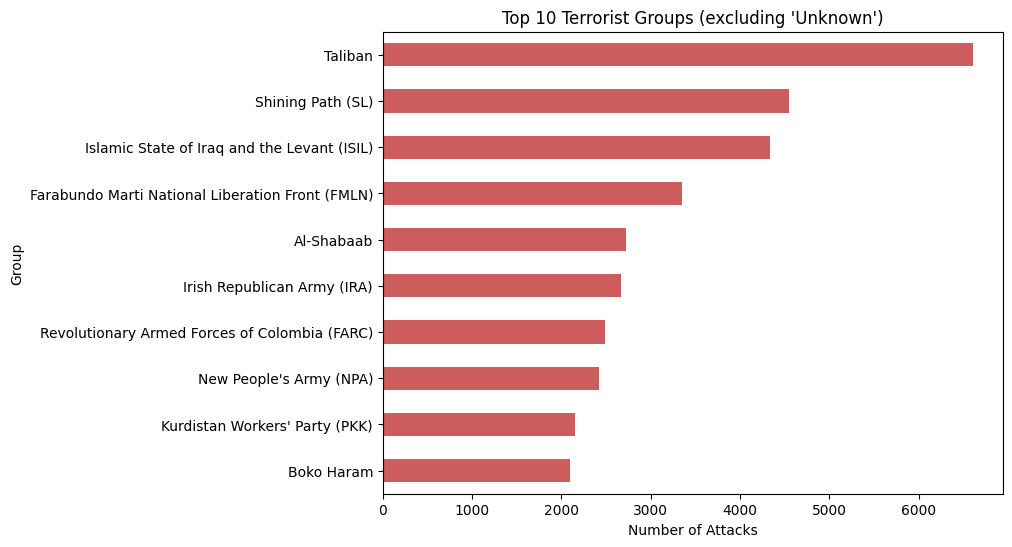

In [44]:
top_groups = data[data['Group'] != 'Unknown']['Group'].value_counts().head(10)
plt.figure(figsize=(8,6))
top_groups.plot(kind='barh', color='indianred')
plt.title("Top 10 Terrorist Groups (excluding 'Unknown')")
plt.xlabel("Number of Attacks")
plt.gca().invert_yaxis()
plt.show()

Top Target Types

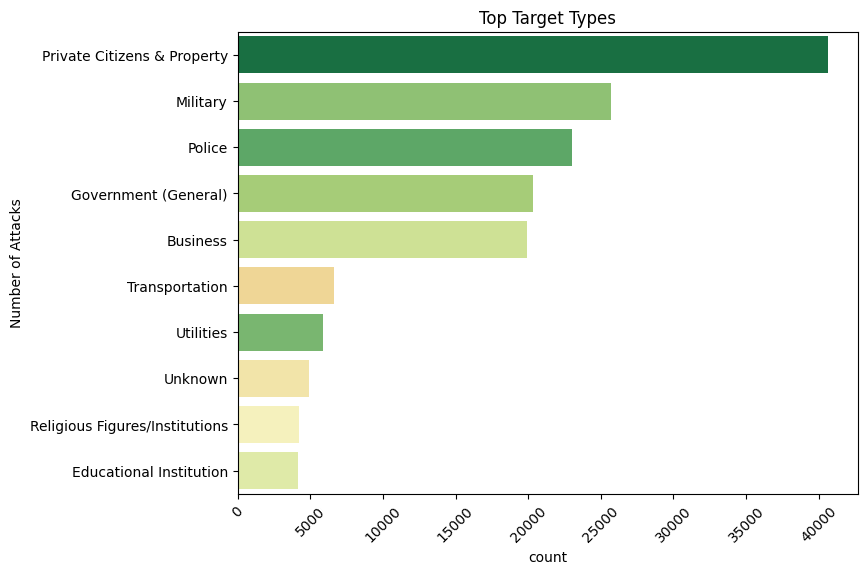

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, y='TargetType',hue='TargetType',legend=False, palette='RdYlGn_r', order=data['TargetType'].value_counts().index[:10])
plt.title("Top Target Types")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.show()

 Yearly Casualties

<Figure size 800x600 with 0 Axes>

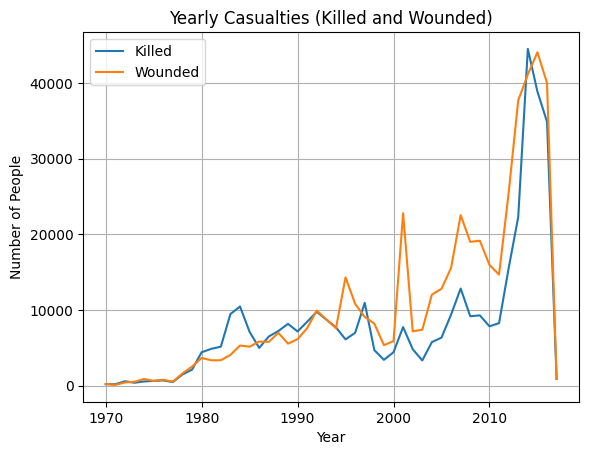

In [48]:
yearly_casualties = data.groupby('Year')[['Killed', 'Wounded']].sum()

plt.figure(figsize=(8,6))
yearly_casualties.plot()
plt.title("Yearly Casualties (Killed and Wounded)")
plt.ylabel("Number of People")
plt.grid(True)
plt.show()